In [1]:
import time

# Start timing the entire notebook
notebook_start_time = time.time()

In [1]:
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
from scipy.signal import resample

import warnings
warnings.filterwarnings("ignore")


In [2]:
pip install pycrostates

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.9/169.9 kB 3.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Define frequency bands
frequency_bands = {
    # 'delta': (0.5, 4),
    # 'theta': (4, 8),
    # 'alpha': (8, 13),
    # 'beta': (13, 30),
    'gamma': (30, 45)
}

for band_name, (l_freq, h_freq) in frequency_bands.items():
    print(f"{band_name} Band - Low freq = {l_freq} Hz and High freq =  {h_freq} Hz")

gamma Band - Low freq = 30 Hz and High freq =  45 Hz


# Pre-Processing Alzheimer Patients

In [3]:
# Alzheimer's EEG files (Filtered Derivatives)
alzheimer_files = [
    '/kaggle/input/alzheimerderivatives/sub-001_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-002_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-003_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-004_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-005_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-006_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-007_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-008_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-009_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-010_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-011_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-012_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-013_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-014_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-015_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-016_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-017_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-018_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-019_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-020_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-021_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-022_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-023_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-024_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-025_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-026_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-027_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-028_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-029_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-030_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-031_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-032_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-033_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-034_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-035_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-036_task-eyesclosed_eeg.set',

]

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from mne.io import read_raw_eeglab

from pycrostates.cluster import ModKMeans
from pycrostates.datasets import lemon
from pycrostates.io import ChData
from pycrostates.preprocessing import extract_gfp_peaks, resample

## Group-level analysis from individual clusters

In [24]:
patients_ad = alzheimer_files # Taking all AD file paths
durations_ad = []

individual_cluster_centers = list()

for file_path in patients_ad:
    raw = mne.io.read_raw_eeglab(file_path, preload=True)  #Loading EEG file
    durations_ad.append(raw.times[-1]) # For minimum duration purpose
    raw.pick("eeg")
    raw.crop(30,40)  # Cut each patient data from 30 seconds to 40 seconds (10 seconds)
    raw.set_eeg_reference("average") # Applying CAR( Common average reference)
    # extract GFP peaks
    gfp_peaks = extract_gfp_peaks(raw, min_peak_distance=20) #extracting GFP peaks
    ModK = ModKMeans(n_clusters=4, random_state=42)
    ModK.fit(gfp_peaks, n_jobs=-1)
    individual_cluster_centers.append(ModK.cluster_centers_)
    
group_cluster_centers = np.vstack(individual_cluster_centers).T
group_cluster_centers = ChData(group_cluster_centers, ModK.info)
print("DONE")

DONE


In [25]:
min_duration = min(durations_ad)
min_duration

599.798

## Group level clustering

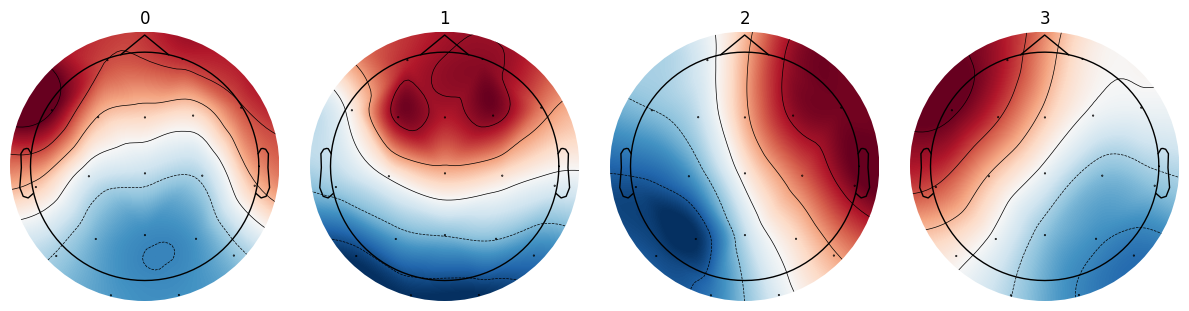

In [11]:
# group level clustering
ModK = ModKMeans(n_clusters=4, random_state=42)
ModK.fit(group_cluster_centers, n_jobs=-1)
ModK.plot();

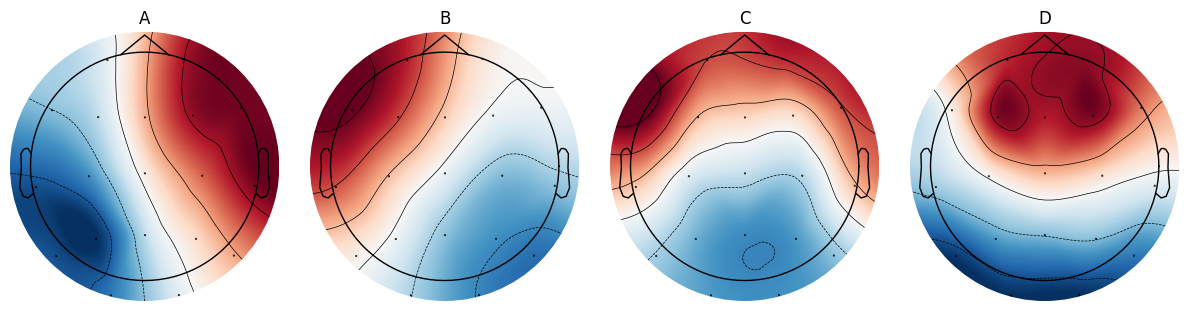

In [12]:
ModK.reorder_clusters(order=[2, 3, 0, 1])
ModK.rename_clusters(new_names=["A", "B", "C", "D"])
# Plot and modify
fig = ModK.plot();  # Generate the plot
# fig.savefig("group_level_clustering_AD.png", dpi=300)  # Save the plot as a PNG file

In [ ]:
subject_ids = np.arange(1, len(alzheimer_files)+1) # total 29 patients AD

##  Microstate Parameters AD

 Data Overview

Duration per patient: 479.098 seconds (~8 minutes)

Sampling rate: 500 Hz

 Epoch Analysis
* Epoch length: 5 seconds
* Epochs per patient: 479.098 / 5 = 95 epochs

 Total Segments  
* Number of patients: 23
* Total epochs: 23 * 95 = 2,185 segments

In [12]:
ms_data = list()
length = 0
transition_prob = pd.DataFrame()

for file_path, subject_id in zip(patients_ad, subject_ids):  # Ensure subject IDs align with file paths
    # Load Data
    raw = mne.io.read_raw_eeglab(file_path, preload=True)
    raw.pick("eeg")
    raw.crop(0, 479.098)  # Crop the dataset to speed up computation taking 9 minutes
    raw.set_eeg_reference("average")
    raw.filter(l_freq, h_freq, fir_design='firwin', verbose=False)  # Apply band-pass filter (e.g., alpha band)
    
    # Define epoch duration (5 seconds) and create epochs
    epoch_duration = 5  # seconds
    epochs = mne.make_fixed_length_epochs(raw, duration=epoch_duration)
    epochs.load_data()
    
    for i in range(len(epochs)):
    
        # Perform microstate segmentation on the entire Epochs object
        # segmentation = ModK.predict(epochs[i] , factor=10, half_window_size=8)  # Perform microstate segmentation
        segmentation = ModK.predict(epochs[i])  # Perform microstate segmentation
    
        # Process segmentation results to compute microstate parameters
        parameters = segmentation.compute_parameters()  # Compute parameters for all epochs
    
        # Compute transition probabilities
        T_observed = segmentation.compute_transition_matrix()

        # Create a DataFrame for the transition matrix and add it to single_row_df
        transition_row = pd.DataFrame([pd.DataFrame(T_observed).values.flatten()])
        transition_prob = pd.concat([transition_prob, transition_row], ignore_index=True)
        
        # parameters["subject_id"] = subject_id
        ms_data.append(parameters)
    

# Convert `ms_data` to a more structured format like a DataFrame (optional, for analysis)
import pandas as pd
ms_data_df = pd.DataFrame(ms_data)


In [13]:
# Rename columns and index
columns = ['A', 'B', 'C', 'D']
index = ['A', 'B', 'C', 'D']

# Create a list of column names
new_columns = []
for i in columns:
    for j in columns:
        new_columns.append(f"{i}_{j}")

In [14]:
transition_prob.columns = new_columns

transition_prob

,A_A,A_B,A_C,A_D,B_A,B_B,B_C,B_D,C_A,C_B,C_C,C_D,D_A,D_B,D_C,D_D
0,0.0,0.220408,0.485714,0.293878,0.555556,0.0,0.312169,0.132275,0.282313,0.377551,0.0,0.340136,0.289340,0.121827,0.588832,0.0
1,0.0,0.287611,0.424779,0.287611,0.460733,0.0,0.413613,0.125654,0.313725,0.290850,0.0,0.395425,0.200957,0.172249,0.626794,0.0
2,0.0,0.257919,0.443439,0.298643,0.468750,0.0,0.375000,0.156250,0.292857,0.360714,0.0,0.346429,0.171717,0.333333,0.494949,0.0
3,0.0,0.268000,0.400000,0.332000,0.517241,0.0,0.285714,0.197044,0.323194,0.326996,0.0,0.349810,0.279070,0.227907,0.493023,0.0
4,0.0,0.323144,0.371179,0.305677,0.447761,0.0,0.363184,0.189055,0.257042,0.299296,0.0,0.443662,0.278970,0.180258,0.540773,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2180,0.0,0.471910,0.168539,0.359551,0.391144,0.0,0.276753,0.332103,0.335260,0.335260,0.0,0.329480,0.427984,0.358025,0.213992,0.0
2181,0.0,0.376384,0.239852,0.383764,0.464286,0.0,0.245536,0.290179,0.303867,0.353591,0.0,0.342541,0.489177,0.251082,0.259740,0.0
2182,0.0,0.368821,0.174905,0.456274,0.485356,0.0,0.205021,0.309623,0.266667,0.327273,0.0,0.406061,0.390805,0.337165,0.272031,0.0
2183,0.0,0.382022,0.213483,0.404494,0.471042,0.0,0.266409,0.262548,0.263959,0.370558,0.0,0.365482,0.372470,0.340081,0.287449,0.0


In [15]:
ms_data_df = pd.concat([ms_data_df, transition_prob], axis=1)
ms_data_df = ms_data_df.drop(["A_A","B_B","C_C","D_D"], axis=1)

In [16]:
ms_data_df

,A_mean_corr,A_gev,A_occurrences,A_timecov,A_meandurs,B_mean_corr,B_gev,B_occurrences,B_timecov,B_meandurs,...,A_D,B_A,B_C,B_D,C_A,C_B,C_D,D_A,D_B,D_C
0,0.574464,0.061142,49.216553,0.214946,0.004367,0.570185,0.054462,38.167939,0.137003,0.003589,...,0.293878,0.555556,0.312169,0.132275,0.282313,0.377551,0.340136,0.289340,0.121827,0.588832
1,0.585890,0.052132,45.272436,0.193109,0.004265,0.591764,0.045202,38.261218,0.161859,0.004230,...,0.287611,0.460733,0.413613,0.125654,0.313725,0.290850,0.395425,0.200957,0.172249,0.626794
2,0.555329,0.045647,44.578313,0.190763,0.004279,0.575946,0.041767,44.979920,0.170683,0.003795,...,0.298643,0.468750,0.375000,0.156250,0.292857,0.360714,0.346429,0.171717,0.333333,0.494949
3,0.573563,0.080368,50.080128,0.247596,0.004944,0.549954,0.036996,40.665064,0.149038,0.003665,...,0.332000,0.517241,0.285714,0.197044,0.323194,0.326996,0.349810,0.279070,0.227907,0.493023
4,0.541170,0.029590,45.947030,0.176565,0.003843,0.560412,0.035603,40.329053,0.161316,0.004000,...,0.305677,0.447761,0.363184,0.189055,0.257042,0.299296,0.443662,0.278970,0.180258,0.540773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2180,0.673987,0.127766,53.707415,0.274549,0.005112,0.712634,0.207850,54.308617,0.301403,0.005550,...,0.359551,0.391144,0.276753,0.332103,0.335260,0.335260,0.329480,0.427984,0.358025,0.213992
2181,0.656072,0.167727,54.509018,0.319439,0.005860,0.667888,0.112128,44.889780,0.221643,0.004938,...,0.383764,0.464286,0.245536,0.290179,0.303867,0.353591,0.342541,0.489177,0.251082,0.259740
2182,0.658292,0.137977,52.790044,0.284223,0.005384,0.683959,0.146560,47.972702,0.237254,0.004946,...,0.456274,0.485356,0.205021,0.309623,0.266667,0.327273,0.406061,0.390805,0.337165,0.272031
2183,0.664657,0.138245,53.528468,0.289495,0.005408,0.686856,0.140624,51.924619,0.250601,0.004826,...,0.404494,0.471042,0.266409,0.262548,0.263959,0.370558,0.365482,0.372470,0.340081,0.287449


In [17]:
ms_data_df['label'] = 1  # 1 For alzheimer

# **Pre-Processing Normal Patient**

In [13]:
# Normal EEG files (Filtered Derivatives)
normal_files = [
    '/kaggle/input/alzheimerderivatives/sub-037_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-038_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-039_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-040_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-041_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-042_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-043_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-044_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-045_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-046_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-047_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-048_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-049_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-050_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-051_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-052_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-053_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-054_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-055_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-056_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-057_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-058_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-059_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-060_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-061_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-062_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-063_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-064_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-065_task-eyesclosed_eeg.set',
]

## Group-level analysis from individual clusters HC

In [26]:
patients_n = normal_files
durations = []
# individual_gfp_peaks = list()
individual_cluster_centers = list()

for file_path in patients_n:
    raw = mne.io.read_raw_eeglab(file_path, preload=True)
    durations.append(raw.times[-1])
    raw.pick("eeg")
    raw.crop(30,40)  # Cut each patient data from 60 seconds to 90 seconds (30 seconds)
    raw.set_eeg_reference("average")
    # extract GFP peaks
    gfp_peaks = extract_gfp_peaks(raw, min_peak_distance=20)
    ModK = ModKMeans(n_clusters=4, random_state=42)
    ModK.fit(gfp_peaks, n_jobs=-1)
    individual_cluster_centers.append(ModK.cluster_centers_)
    # individual_gfp_peaks.append(gfp_peaks.get_data())
    # print(file_path)
group_cluster_centers = np.vstack(individual_cluster_centers).T
group_cluster_centers = ChData(group_cluster_centers, ModK.info)
print("DONE")

DONE


In [15]:
min_duration = min(durations)
min_duration

753.038

## Group level clustering HC

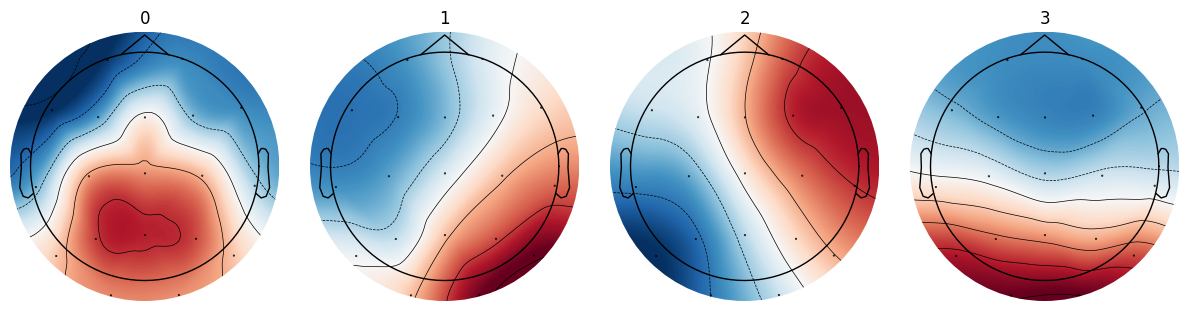

In [27]:
# group level clustering
ModK = ModKMeans(n_clusters=4, random_state=42)
ModK.fit(group_cluster_centers, n_jobs=-1)
ModK.plot();

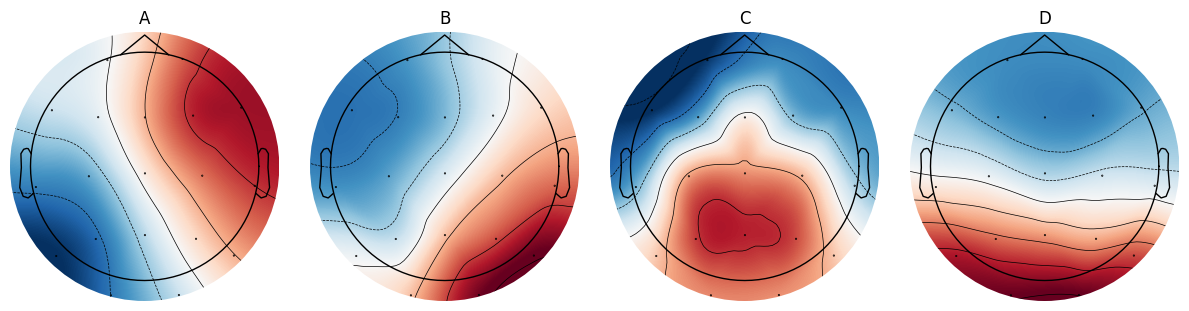

In [28]:
ModK.reorder_clusters(order=[2, 1, 0, 3])
ModK.rename_clusters(new_names=["A", "B", "C", "D"])
# Plot and modify
fig = ModK.plot();  # Generate the plot
# fig.savefig("group_level_clustering_HC.png", dpi=300)  # Save the plot as a PNG file

In [23]:
subject_ids = np.arange(1, len(normal_files)+1)

## Microstate Parameters HC

In [24]:
ms_data_hc = list()
length = 0
transition_prob_hc = pd.DataFrame()

for file_path, subject_id in zip(patients_n, subject_ids):  # Ensure subject IDs align with file paths
    # Load Data
    raw = mne.io.read_raw_eeglab(file_path, preload=True)
    raw.pick("eeg")
    raw.crop(0, 479.098)  # Crop the dataset to speed up computation
    raw.set_eeg_reference("average")
    raw.filter(l_freq, h_freq, fir_design='firwin', verbose=False)  # Apply band-pass filter (e.g., theta band)
    
    # Define epoch duration (5 seconds) and create epochs
    epoch_duration = 5  # seconds
    epochs = mne.make_fixed_length_epochs(raw, duration=epoch_duration)
    epochs.load_data()
    
    for i in range(len(epochs)):
    
        # Perform microstate segmentation on the entire Epochs object
        # segmentation = ModK.predict(epochs[i] , factor=10, half_window_size=8)  # Perform microstate segmentation
        segmentation = ModK.predict(epochs[i])  # Perform microstate segmentation
    
        # Process segmentation results to compute microstate parameters
        parameters = segmentation.compute_parameters()  # Compute parameters for all epochs

        # Compute transition probabilities
        T_observed = segmentation.compute_transition_matrix()

        # Create a DataFrame for the transition matrix and add it to single_row_df
        transition_row = pd.DataFrame([pd.DataFrame(T_observed).values.flatten()])
        transition_prob_hc = pd.concat([transition_prob_hc, transition_row], ignore_index=True)

        # parameters["subject_id"] = subject_id
        ms_data_hc.append(parameters)
    

# Convert `ms_data` to a more structured format like a DataFrame (optional, for analysis)
import pandas as pd
ms_data_hc_df = pd.DataFrame(ms_data_hc)


In [25]:
transition_prob_hc.columns = new_columns

transition_prob_hc

,A_A,A_B,A_C,A_D,B_A,B_B,B_C,B_D,C_A,C_B,C_C,C_D,D_A,D_B,D_C,D_D
0,0.0,0.357934,0.236162,0.405904,0.418699,0.0,0.227642,0.353659,0.343195,0.313609,0.0,0.343195,0.431373,0.376471,0.192157,0.0
1,0.0,0.404332,0.238267,0.357401,0.395257,0.0,0.233202,0.371542,0.395833,0.343750,0.0,0.260417,0.415638,0.308642,0.275720,0.0
2,0.0,0.412214,0.335878,0.251908,0.372881,0.0,0.266949,0.360169,0.390698,0.306977,0.0,0.302326,0.419355,0.285714,0.294931,0.0
3,0.0,0.376426,0.342205,0.281369,0.410959,0.0,0.251142,0.337900,0.418605,0.297674,0.0,0.283721,0.392344,0.272727,0.334928,0.0
4,0.0,0.329004,0.311688,0.359307,0.395918,0.0,0.293878,0.310204,0.295775,0.366197,0.0,0.338028,0.307359,0.389610,0.303030,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2180,0.0,0.326733,0.297030,0.376238,0.334677,0.0,0.290323,0.375000,0.216981,0.415094,0.0,0.367925,0.295547,0.384615,0.319838,0.0
2181,0.0,0.383420,0.238342,0.378238,0.296443,0.0,0.335968,0.367589,0.280374,0.387850,0.0,0.331776,0.240506,0.405063,0.354430,0.0
2182,0.0,0.422414,0.271552,0.306034,0.288703,0.0,0.351464,0.359833,0.293839,0.298578,0.0,0.407583,0.415638,0.325103,0.259259,0.0
2183,0.0,0.457895,0.294737,0.247368,0.267717,0.0,0.464567,0.267717,0.282051,0.397436,0.0,0.320513,0.294737,0.389474,0.315789,0.0


In [26]:
ms_data_hc_df = pd.concat([ms_data_hc_df, transition_prob_hc], axis=1)
ms_data_hc_df = ms_data_hc_df.drop(["A_A","B_B","C_C","D_D"], axis=1)

In [27]:
ms_data_hc_df

,A_mean_corr,A_gev,A_occurrences,A_timecov,A_meandurs,B_mean_corr,B_gev,B_occurrences,B_timecov,B_meandurs,...,A_D,B_A,B_C,B_D,C_A,C_B,C_D,D_A,D_B,D_C
0,0.524636,0.117501,54.373997,0.317817,0.005845,0.498278,0.068605,49.357945,0.247191,0.005008,...,0.405904,0.418699,0.227642,0.353659,0.343195,0.313609,0.343195,0.431373,0.376471,0.192157
1,0.520441,0.099567,55.488782,0.307292,0.005538,0.502264,0.072087,50.681090,0.246795,0.004870,...,0.357401,0.395257,0.233202,0.371542,0.395833,0.343750,0.260417,0.415638,0.308642,0.275720
2,0.511827,0.100457,52.705411,0.298998,0.005673,0.522978,0.076531,47.294589,0.243287,0.005144,...,0.251908,0.372881,0.266949,0.360169,0.390698,0.306977,0.302326,0.419355,0.285714,0.294931
3,0.504521,0.115908,52.663196,0.318382,0.006046,0.484911,0.054048,44.052863,0.219463,0.004982,...,0.281369,0.410959,0.251142,0.337900,0.418605,0.297674,0.283721,0.392344,0.272727,0.334928
4,0.509621,0.072570,46.292585,0.224449,0.004848,0.527958,0.099075,49.098196,0.285371,0.005812,...,0.359307,0.395918,0.293878,0.310204,0.295775,0.366197,0.338028,0.307359,0.389610,0.303030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2180,0.497182,0.041514,40.594855,0.175643,0.004327,0.585425,0.109248,50.040193,0.279743,0.005590,...,0.376238,0.334677,0.290323,0.375000,0.216981,0.415094,0.367925,0.295547,0.384615,0.319838
2181,0.480717,0.028459,38.630905,0.152122,0.003938,0.595493,0.137348,50.640512,0.331865,0.006553,...,0.378238,0.296443,0.335968,0.367589,0.280374,0.387850,0.331776,0.240506,0.405063,0.354430
2182,0.508132,0.049284,46.623794,0.204180,0.004379,0.566706,0.101214,48.231511,0.262460,0.005442,...,0.306034,0.288703,0.351464,0.359833,0.293839,0.298578,0.407583,0.415638,0.325103,0.259259
2183,0.493769,0.034774,38.230584,0.172538,0.004513,0.577172,0.122489,50.840673,0.324660,0.006386,...,0.247368,0.267717,0.464567,0.267717,0.282051,0.397436,0.320513,0.294737,0.389474,0.315789


In [28]:
ms_data_hc_df['label'] = 0  # 0 For normal

In [29]:
ms_data_hc_df

,A_mean_corr,A_gev,A_occurrences,A_timecov,A_meandurs,B_mean_corr,B_gev,B_occurrences,B_timecov,B_meandurs,...,B_A,B_C,B_D,C_A,C_B,C_D,D_A,D_B,D_C,label
0,0.524636,0.117501,54.373997,0.317817,0.005845,0.498278,0.068605,49.357945,0.247191,0.005008,...,0.418699,0.227642,0.353659,0.343195,0.313609,0.343195,0.431373,0.376471,0.192157,0
1,0.520441,0.099567,55.488782,0.307292,0.005538,0.502264,0.072087,50.681090,0.246795,0.004870,...,0.395257,0.233202,0.371542,0.395833,0.343750,0.260417,0.415638,0.308642,0.275720,0
2,0.511827,0.100457,52.705411,0.298998,0.005673,0.522978,0.076531,47.294589,0.243287,0.005144,...,0.372881,0.266949,0.360169,0.390698,0.306977,0.302326,0.419355,0.285714,0.294931,0
3,0.504521,0.115908,52.663196,0.318382,0.006046,0.484911,0.054048,44.052863,0.219463,0.004982,...,0.410959,0.251142,0.337900,0.418605,0.297674,0.283721,0.392344,0.272727,0.334928,0
4,0.509621,0.072570,46.292585,0.224449,0.004848,0.527958,0.099075,49.098196,0.285371,0.005812,...,0.395918,0.293878,0.310204,0.295775,0.366197,0.338028,0.307359,0.389610,0.303030,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2180,0.497182,0.041514,40.594855,0.175643,0.004327,0.585425,0.109248,50.040193,0.279743,0.005590,...,0.334677,0.290323,0.375000,0.216981,0.415094,0.367925,0.295547,0.384615,0.319838,0
2181,0.480717,0.028459,38.630905,0.152122,0.003938,0.595493,0.137348,50.640512,0.331865,0.006553,...,0.296443,0.335968,0.367589,0.280374,0.387850,0.331776,0.240506,0.405063,0.354430,0
2182,0.508132,0.049284,46.623794,0.204180,0.004379,0.566706,0.101214,48.231511,0.262460,0.005442,...,0.288703,0.351464,0.359833,0.293839,0.298578,0.407583,0.415638,0.325103,0.259259,0
2183,0.493769,0.034774,38.230584,0.172538,0.004513,0.577172,0.122489,50.840673,0.324660,0.006386,...,0.267717,0.464567,0.267717,0.282051,0.397436,0.320513,0.294737,0.389474,0.315789,0


# **Pre-Processing Dementia Patient**

In [19]:
# Dementia EEG files (Filtered Derivatives)
dementia_files = [
    '/kaggle/input/alzheimerderivatives/sub-066_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-067_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-068_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-069_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-070_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-071_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-072_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-073_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-074_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-075_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-076_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-077_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-078_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-079_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-080_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-081_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-082_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-083_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-084_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-085_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-086_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-087_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-088_task-eyesclosed_eeg.set',
 ]

## Group-level analysis from individual clusters FTD

In [29]:
patients_f = dementia_files
durations = []
# individual_gfp_peaks = list()
individual_cluster_centers = list()

for file_path in patients_f:
    raw = mne.io.read_raw_eeglab(file_path, preload=True)
    durations.append(raw.times[-1])
    raw.pick("eeg")
    raw.crop(30, 40)  # Cut each patient data from 60 seconds to 90 seconds (30 seconds)
    raw.set_eeg_reference("average")
    # extract GFP peaks
    gfp_peaks = extract_gfp_peaks(raw, min_peak_distance=20)
    ModK = ModKMeans(n_clusters=4, random_state=42)
    ModK.fit(gfp_peaks, n_jobs=-1)
    individual_cluster_centers.append(ModK.cluster_centers_)
    # individual_gfp_peaks.append(gfp_peaks.get_data())
    # print(file_path)
group_cluster_centers = np.vstack(individual_cluster_centers).T
group_cluster_centers = ChData(group_cluster_centers, ModK.info)
print("DONE")

DONE


In [30]:
min_duration = min(durations)
min_duration

479.098

## Group level clustering FTD

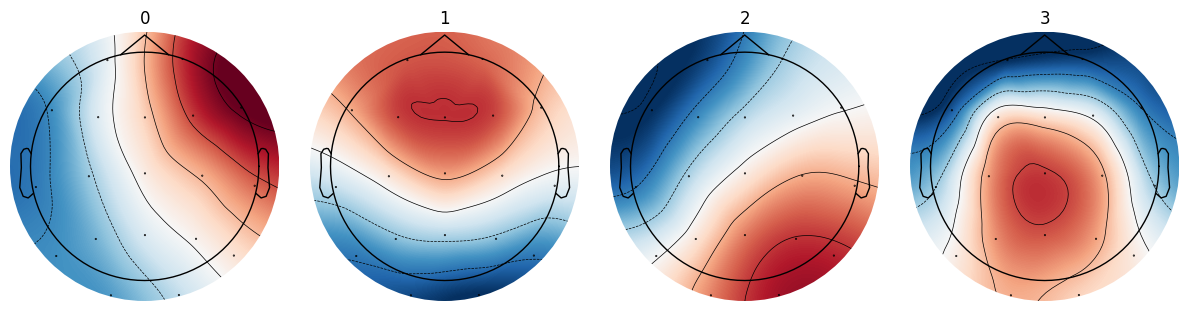

In [31]:
# group level clustering
ModK = ModKMeans(n_clusters=4, random_state=42)
ModK.fit(group_cluster_centers, n_jobs=-1)
ModK.plot();

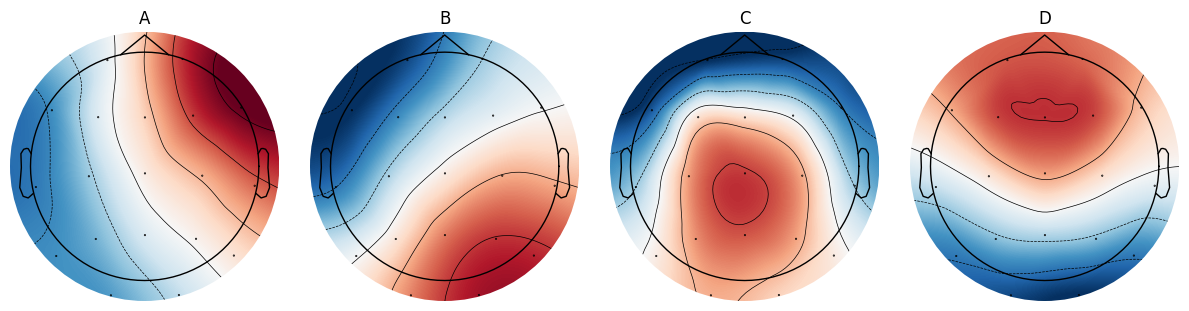

In [23]:
ModK.reorder_clusters(order=[0, 2, 3, 1])
ModK.rename_clusters(new_names=["A", "B", "C", "D"])
# Plot and modify
fig = ModK.plot();  # Generate the plot
# fig.savefig("group_level_clustering_FTD.png", dpi=300)  # Save the plot as a PNG file

In [ ]:
subject_ids = np.arange(1, len(dementia_files)+1)

## Microstate parameters Dementia

In [36]:
ms_data_f = list()
length = 0
transition_prob_f = pd.DataFrame()

for file_path, subject_id in zip(patients_f, subject_ids):  # Ensure subject IDs align with file paths
    # Load Data
    raw = mne.io.read_raw_eeglab(file_path, preload=True)
    raw.pick("eeg")
    raw.crop(0, 479.098)  # Crop the dataset to speed up computation
    raw.set_eeg_reference("average")
    raw.filter(l_freq, h_freq, fir_design='firwin', verbose=False)  # Apply band-pass filter (e.g., theta band)
    
    # Define epoch duration (5 seconds) and create epochs
    epoch_duration = 5  # seconds
    epochs = mne.make_fixed_length_epochs(raw, duration=epoch_duration)
    epochs.load_data()
    
    for i in range(len(epochs)):
    
        # Perform microstate segmentation on the entire Epochs object
        # segmentation = ModK.predict(epochs[i] , factor=10, half_window_size=8)  # Perform microstate segmentation
        segmentation = ModK.predict(epochs[i])  # Perform microstate segmentation
    
        # Process segmentation results to compute microstate parameters
        parameters = segmentation.compute_parameters()  # Compute parameters for all epochs

        # Compute transition probabilities
        T_observed = segmentation.compute_transition_matrix()

        # Create a DataFrame for the transition matrix and add it to single_row_df
        transition_row = pd.DataFrame([pd.DataFrame(T_observed).values.flatten()])
        transition_prob_f = pd.concat([transition_prob_f, transition_row], ignore_index=True)
    
        # parameters["subject_id"] = subject_id
        ms_data_f.append(parameters)
    

# Convert `ms_data` to a more structured format like a DataFrame (optional, for analysis)
import pandas as pd
ms_data_f_df = pd.DataFrame(ms_data_f)


In [37]:
transition_prob_f.columns = new_columns

ms_data_f_df = pd.concat([ms_data_f_df, transition_prob_f], axis=1)
ms_data_f_df = ms_data_f_df.drop(["A_A","B_B","C_C","D_D"], axis=1)

ms_data_f_df

,A_mean_corr,A_gev,A_occurrences,A_timecov,A_meandurs,B_mean_corr,B_gev,B_occurrences,B_timecov,B_meandurs,...,A_D,B_A,B_C,B_D,C_A,C_B,C_D,D_A,D_B,D_C
0,0.569534,0.209179,59.012445,0.472100,0.008000,0.565147,0.094952,50.180650,0.276194,0.005504,...,0.283276,0.540000,0.120000,0.340000,0.503546,0.390071,0.106383,0.480874,0.415301,0.103825
1,0.568119,0.207820,63.052209,0.495984,0.007866,0.569482,0.090658,50.602410,0.263855,0.005214,...,0.277070,0.579365,0.190476,0.230159,0.557692,0.288462,0.153846,0.479290,0.420118,0.100592
2,0.574692,0.205070,60.521042,0.456112,0.007536,0.573211,0.108785,52.304609,0.295792,0.005655,...,0.322259,0.524904,0.229885,0.245211,0.526667,0.326667,0.146667,0.467391,0.429348,0.103261
3,0.582912,0.164173,59.991974,0.440209,0.007338,0.571955,0.090257,49.357945,0.261637,0.005301,...,0.374582,0.473469,0.200000,0.326531,0.601399,0.244755,0.153846,0.453271,0.392523,0.154206
4,0.563069,0.197619,60.897436,0.456330,0.007493,0.561794,0.098347,53.084936,0.296875,0.005592,...,0.322368,0.535849,0.211321,0.252830,0.570513,0.282051,0.147436,0.388298,0.494681,0.117021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2180,0.519677,0.077084,46.856227,0.263116,0.005615,0.574557,0.107979,49.659592,0.294353,0.005927,...,0.450644,0.375000,0.266129,0.358871,0.297143,0.302857,0.400000,0.337121,0.431818,0.231061
2181,0.521160,0.076444,42.834267,0.223779,0.005224,0.599760,0.112045,47.838271,0.282626,0.005908,...,0.361502,0.284519,0.271967,0.443515,0.220994,0.309392,0.469613,0.391791,0.324627,0.283582
2182,0.462885,0.047579,40.464744,0.191106,0.004723,0.551672,0.080087,46.674679,0.256410,0.005494,...,0.313433,0.218884,0.347639,0.433476,0.236453,0.261084,0.502463,0.387218,0.334586,0.278195
2183,0.506458,0.069215,44.889780,0.232866,0.005187,0.584247,0.121632,49.298597,0.313828,0.006366,...,0.455357,0.365854,0.227642,0.406504,0.348684,0.335526,0.315789,0.325301,0.441767,0.232932


In [38]:
ms_data_f_df['label'] = 2  # 2 For dementia

# Concatenate AD and Normal and FTD

In [40]:
# Combine the DataFrames
df = pd.concat([ms_data_df, ms_data_hc_df, ms_data_f_df], ignore_index=True)

In [42]:
df

,A_mean_corr,A_gev,A_occurrences,A_timecov,A_meandurs,B_mean_corr,B_gev,B_occurrences,B_timecov,B_meandurs,...,B_A,B_C,B_D,C_A,C_B,C_D,D_A,D_B,D_C,label
0,0.574464,0.061142,49.216553,0.214946,0.004367,0.570185,0.054462,38.167939,0.137003,0.003589,...,0.555556,0.312169,0.132275,0.282313,0.377551,0.340136,0.289340,0.121827,0.588832,1
1,0.585890,0.052132,45.272436,0.193109,0.004265,0.591764,0.045202,38.261218,0.161859,0.004230,...,0.460733,0.413613,0.125654,0.313725,0.290850,0.395425,0.200957,0.172249,0.626794,1
2,0.555329,0.045647,44.578313,0.190763,0.004279,0.575946,0.041767,44.979920,0.170683,0.003795,...,0.468750,0.375000,0.156250,0.292857,0.360714,0.346429,0.171717,0.333333,0.494949,1
3,0.573563,0.080368,50.080128,0.247596,0.004944,0.549954,0.036996,40.665064,0.149038,0.003665,...,0.517241,0.285714,0.197044,0.323194,0.326996,0.349810,0.279070,0.227907,0.493023,1
4,0.541170,0.029590,45.947030,0.176565,0.003843,0.560412,0.035603,40.329053,0.161316,0.004000,...,0.447761,0.363184,0.189055,0.257042,0.299296,0.443662,0.278970,0.180258,0.540773,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6550,0.519677,0.077084,46.856227,0.263116,0.005615,0.574557,0.107979,49.659592,0.294353,0.005927,...,0.375000,0.266129,0.358871,0.297143,0.302857,0.400000,0.337121,0.431818,0.231061,2
6551,0.521160,0.076444,42.834267,0.223779,0.005224,0.599760,0.112045,47.838271,0.282626,0.005908,...,0.284519,0.271967,0.443515,0.220994,0.309392,0.469613,0.391791,0.324627,0.283582,2
6552,0.462885,0.047579,40.464744,0.191106,0.004723,0.551672,0.080087,46.674679,0.256410,0.005494,...,0.218884,0.347639,0.433476,0.236453,0.261084,0.502463,0.387218,0.334586,0.278195,2
6553,0.506458,0.069215,44.889780,0.232866,0.005187,0.584247,0.121632,49.298597,0.313828,0.006366,...,0.365854,0.227642,0.406504,0.348684,0.335526,0.315789,0.325301,0.441767,0.232932,2


# Train test split

In [43]:
correlations = df.corr(method = 'pearson')
print(correlations['label'].sort_values(ascending= False).to_string())

label            1.000000
A_C              0.260061
C_timecov        0.192992
C_occurrences    0.183464
B_C              0.164506
C_meandurs       0.146440
D_C              0.145420
C_A              0.144354
A_meandurs       0.052591
C_gev            0.051934
unlabeled        0.020924
A_timecov        0.010315
C_D             -0.048515
D_B             -0.056885
B_meandurs      -0.071219
A_occurrences   -0.088356
B_D             -0.088760
B_A             -0.096425
B_gev           -0.098271
C_B             -0.128347
B_timecov       -0.131845
A_gev           -0.132060
D_A             -0.146692
D_timecov       -0.151282
D_meandurs      -0.156663
D_occurrences   -0.166575
B_mean_corr     -0.174087
A_D             -0.181457
A_B             -0.188875
B_occurrences   -0.211698
C_mean_corr     -0.279119
D_gev           -0.319019
A_mean_corr     -0.324660
D_mean_corr     -0.411646


In [44]:
df= df.drop(columns = ['unlabeled']) #dropping unnecessary columns

In [45]:
# df = output_df

from sklearn.preprocessing import LabelEncoder

df_features= df.drop(columns = ['label'])
df_label = df['label']

X= df_features
y = df_label

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()
StandardScaler_df = scaler1.fit_transform( X )       
StandardScaler_df

array([[ 0.30622875, -0.60861433,  0.07727077, ..., -0.82713461,
        -2.48256416,  2.34491088],
       [ 0.45639577, -0.76273897, -0.50194585, ..., -1.90495846,
        -1.85688403,  2.67720322],
       [ 0.05475464, -0.87366661, -0.60388181, ..., -2.26153449,
         0.14201733,  1.52312098],
       ...,
       [-1.16018847, -0.84062215, -1.20798355, ...,  0.36647712,
         0.15756749, -0.37420087],
       [-0.58753555, -0.47051513, -0.55814117, ..., -0.38859255,
         1.48757386, -0.77041004],
       [-0.71905881, -0.82786567, -0.94321941, ..., -0.50702761,
         1.00703149, -0.34642361]])

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(StandardScaler_df, y, test_size=0.3, random_state=42 )

print(" Train data shape X :", X_train.shape)
print(" Train data shape y:", y_train.shape)

print(" Test data shape X :", X_test.shape)
print(" Test data shape y :", y_test.shape)

 Train data shape X : (4588, 32)
 Train data shape y: (4588,)
 Test data shape X : (1967, 32)
 Test data shape y : (1967,)


In [47]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [48]:
# Start timing the cell you want to exclude
exclude_start_time = time.time()

In [49]:
# Initializing classifiers with default parameters
classifiers = {
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'AdaBoost': AdaBoostClassifier(),
    # 'Naive Bayes': GaussianNB(),
    # 'Gradient Boosting': GradientBoostingClassifier()
}

# Defining hyperparameter search spaces for each classifier
param_grids = {
    'SVM': {'C': np.logspace(-2, 2, 5), 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto']},
    'Random Forest': {'n_estimators': [10, 50, 100, 200], 'max_depth': np.arange(1, 11), 'criterion': ['gini', 'entropy']},
    'KNN': {'n_neighbors': np.arange(1, 11)},
    'Decision Tree': {'max_depth': np.arange(1, 11), 'criterion': ['gini', 'entropy']},
    'Logistic Regression': {'C': np.logspace(-2, 2, 5), 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
    'AdaBoost': {'n_estimators': [10, 50, 100, 200], 'learning_rate': [0.001, 0.01, 0.1, 1]},
    # 'Naive Bayes': {},
    # 'Gradient Boosting': {'n_estimators': [10, 50, 100, 200], 'learning_rate': [ 0.01, 0.1, 0.5, 1], 'max_depth': np.arange(1, 11)}
}

# Performing hyperparameter tuning for each classifier using GridSearchCV
best_classifiers = {}
for classifier_name, classifier in classifiers.items():
    grid_search = GridSearchCV(classifier, param_grids[classifier_name], scoring='accuracy', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_classifiers[classifier_name] = grid_search.best_estimator_
    print(f"{classifier_name}: Best parameters - {grid_search.best_params_}, Best score - {grid_search.best_score_}")

SVM: Best parameters - {'C': 10.0, 'gamma': 'scale', 'kernel': 'rbf'}, Best score - 0.9531381339643575
Random Forest: Best parameters - {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 200}, Best score - 0.8855698343798928
KNN: Best parameters - {'n_neighbors': 9}, Best score - 0.8631242827919972
Decision Tree: Best parameters - {'criterion': 'entropy', 'max_depth': 10}, Best score - 0.7722318443917006
Logistic Regression: Best parameters - {'C': 10.0, 'solver': 'lbfgs'}, Best score - 0.9341758077276712
AdaBoost: Best parameters - {'learning_rate': 1, 'n_estimators': 200}, Best score - 0.8886201808967862


In [50]:
# End timing for the excluded cell
exclude_end_time = time.time()

In [51]:
# Compute the excluded cell's execution time
excluded_time = exclude_end_time - exclude_start_time
print(f"Excluded cell execution time: {excluded_time:.2f} seconds")

Excluded cell execution time: 337.03 seconds


In [52]:
# --- remaining cells that should be counted ---
remaining_start_time = time.time()

In [53]:
# Testing the best models on test data
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Testing models on the test data...")
for classifier_name, best_model in best_classifiers.items():
    # Predicting on the test data
    y_pred = best_model.predict(X_test)
    
    # Calculating accuracy
    accuracy = accuracy_score(y_test, y_pred)*100
    print(f"{classifier_name}:")
    print(f"Accuracy on test data: {accuracy:.4f}")
    
    # # Compute and display classification report in decimals
    # report = classification_report(y_test, y_pred, output_dict=True)
    # report_df = pd.DataFrame(report).transpose()
    # print(report_df.round(4)*100)
    
    # # Confusion matrix
    # print("\nConfusion Matrix:")
    # print(confusion_matrix(y_test, y_pred))
    # print("\n" + "-"*50 + "\n")


Testing models on the test data...
SVM:
Accuracy on test data: 95.9329
Random Forest:
Accuracy on test data: 90.1881
KNN:
Accuracy on test data: 86.7311
Decision Tree:
Accuracy on test data: 79.5119
Logistic Regression:
Accuracy on test data: 92.8826
AdaBoost:
Accuracy on test data: 88.7138


              precision  recall  f1-score    support
0                 96.50   96.36     96.43   65900.00
1                 97.35   96.92     97.13   68100.00
2                 93.82   94.42     94.12   62700.00
accuracy          95.93   95.93     95.93      95.93
macro avg         95.89   95.90     95.89  196700.00
weighted avg      95.94   95.93     95.94  196700.00
Train Accuracy: 98.344
Test Accuracy: 95.93
Multiclass AUC Score: 0.9952


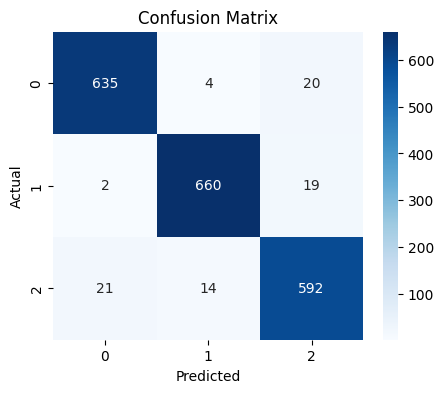

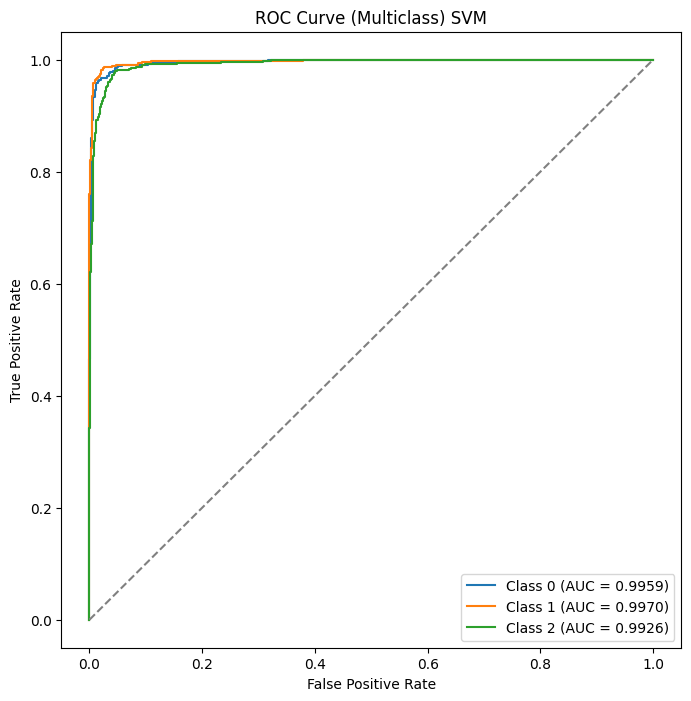

In [54]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Initialize the SVM classifier
svm_classifier = SVC(C=10, gamma='scale', kernel='rbf',  probability=True)  # You can also try other kernels like 'rbf'

# Train the model
svm_classifier.fit(X_train, y_train)

# Predict on test data
y_pred_SVM = svm_classifier.predict(X_test)

# Compute and display classification report in decimals
report = classification_report(y_test, y_pred_SVM, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df.round(4)*100)

# Display train and test accuracy
print("Train Accuracy:", accuracy_score(svm_classifier.predict(X_train), y_train).round(5)*100)
print("Test Accuracy:", accuracy_score(y_pred_SVM, y_test).round(4)*100)

y_probs_svm = svm_classifier.predict_proba(X_test)
# Calculate AUC score for multiclass
auc_score = roc_auc_score(y_test, y_probs_svm, multi_class='ovr')
print(f"Multiclass AUC Score: {auc_score:.4f}")

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_SVM)

# Visualize the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=svm_classifier.classes_, yticklabels=svm_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC Curve for each class
plt.figure(figsize=(8, 8))
for i, class_label in enumerate(svm_classifier.classes_):
    fpr, tpr, _ = roc_curve((y_test == class_label).astype(int), y_probs_svm[:, i])
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc_score((y_test == class_label).astype(int), y_probs_svm[:, i]):.4f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multiclass) SVM')
plt.legend(loc='lower right')
plt.show()

              precision  recall  f1-score    support
0                 87.99   92.26     90.07   65900.00
1                 92.42   93.10     92.76   68100.00
2                 92.37   86.92     89.56   62700.00
accuracy          90.85   90.85     90.85      90.85
macro avg         90.93   90.76     90.80  196700.00
weighted avg      90.92   90.85     90.84  196700.00
Train Accuracy: 98.69
Test Accuracy: 90.85
Multiclass AUC Score: 0.9803


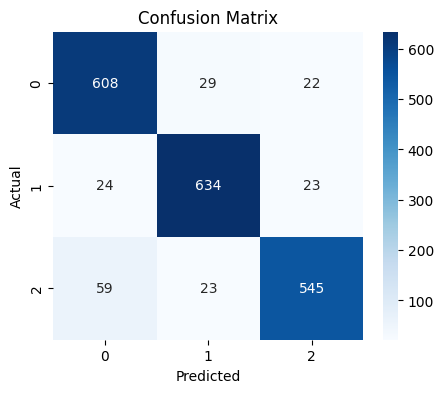

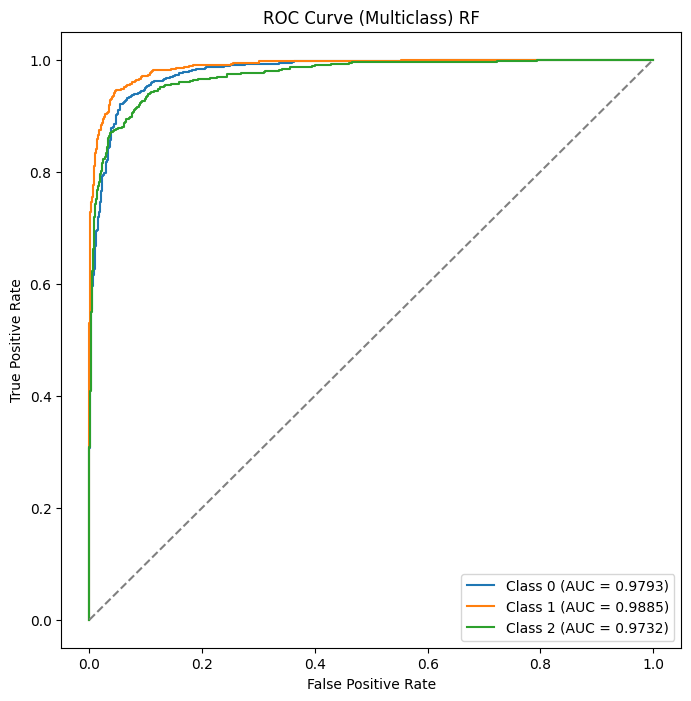

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(criterion= 'entropy', max_depth= 10, n_estimators= 200 )

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on test data
y_pred_RF = rf_classifier.predict(X_test)

# Print classification report
report = classification_report(y_test, y_pred_RF, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df.round(4)*100)

print("Train Accuracy:", accuracy_score(rf_classifier.predict(X_train), y_train).round(4)*100)
print("Test Accuracy:", accuracy_score(y_pred_RF, y_test).round(4)*100)

y_probs_rf = rf_classifier.predict_proba(X_test)
# Calculate AUC score for multiclass
auc_score = roc_auc_score(y_test, y_probs_rf, multi_class='ovr')
print(f"Multiclass AUC Score: {auc_score:.4f}")

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_RF)

# Visualize the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC Curve for each class
plt.figure(figsize=(8, 8))
for i, class_label in enumerate(rf_classifier.classes_):
    fpr, tpr, _ = roc_curve((y_test == class_label).astype(int), y_probs_rf[:, i])
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc_score((y_test == class_label).astype(int), y_probs_rf[:, i]):.4f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multiclass) RF')
plt.legend(loc='lower right')
plt.show()

              precision  recall  f1-score    support
0                 79.25   89.23     83.94   65900.00
1                 93.94   86.49     90.06   68100.00
2                 88.46   84.37     86.37   62700.00
accuracy          86.73   86.73     86.73      86.73
macro avg         87.22   86.70     86.79  196700.00
weighted avg      87.27   86.73     86.83  196700.00
Train Accuracy: 90.19
Test Accuracy: 86.72999999999999
Multiclass AUC Score: 0.9645


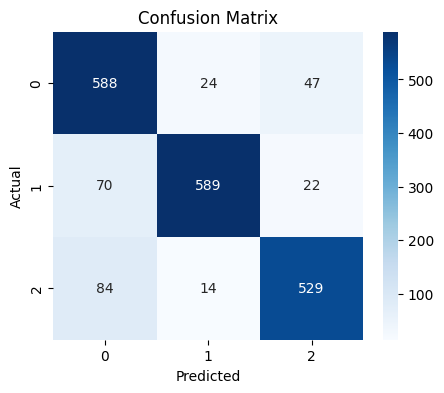

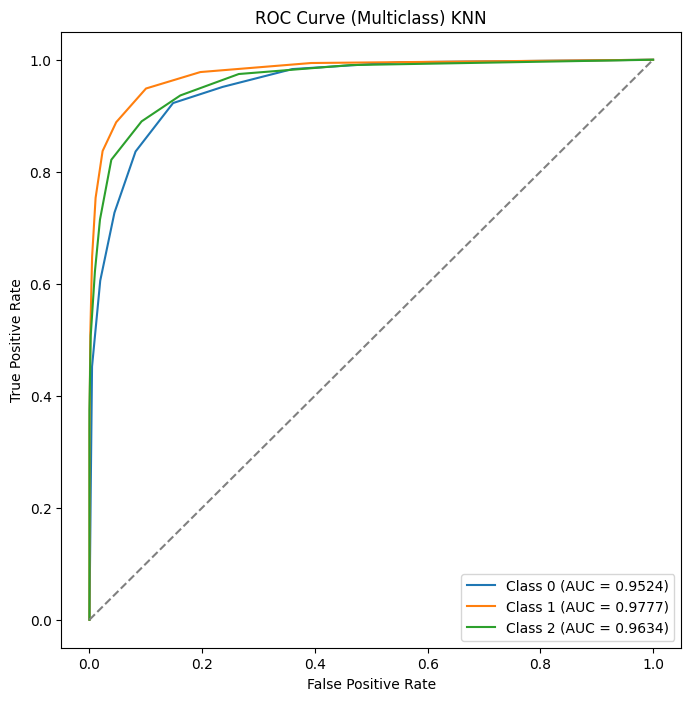

In [56]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=9)

# Train the model
knn_classifier.fit(X_train, y_train)

# Predict on test data
y_pred_KNN = knn_classifier.predict(X_test)

# Print classification report
report = classification_report(y_test, y_pred_KNN, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df.round(4)*100)
print("Train Accuracy:", accuracy_score(knn_classifier.predict(X_train), y_train).round(4)*100)
print("Test Accuracy:", accuracy_score(y_pred_KNN, y_test).round(4)*100)

y_probs_knn = knn_classifier.predict_proba(X_test)
# Calculate AUC score for multiclass
auc_score = roc_auc_score(y_test, y_probs_knn, multi_class='ovr')
print(f"Multiclass AUC Score: {auc_score:.4f}")

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_KNN)
# Visualize the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=knn_classifier.classes_, yticklabels=knn_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC Curve for each class
plt.figure(figsize=(8, 8))
for i, class_label in enumerate(knn_classifier.classes_):
    fpr, tpr, _ = roc_curve((y_test == class_label).astype(int), y_probs_knn[:, i])
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc_score((y_test == class_label).astype(int), y_probs_knn[:, i]):.4f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multiclass) KNN')
plt.legend(loc='lower right')
plt.show()

              precision  recall  f1-score     support
0                77.465  83.460    80.351   65900.000
1                85.063  79.442    82.156   68100.000
2                75.362  74.641    75.000   62700.000
accuracy         79.258  79.258    79.258      79.258
macro avg        79.297  79.181    79.169  196700.000
weighted avg     79.425  79.258    79.270  196700.000
Train Accuracy: 92.2
Test Accuracy: 79.25999999999999
Multiclass AUC Score: 0.8880


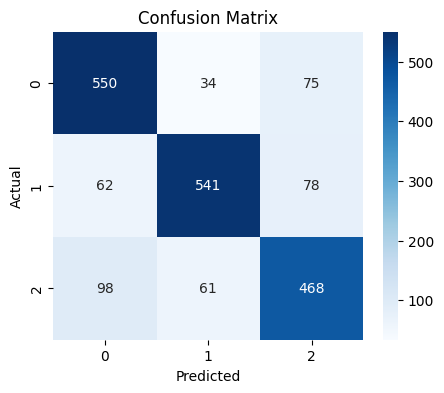

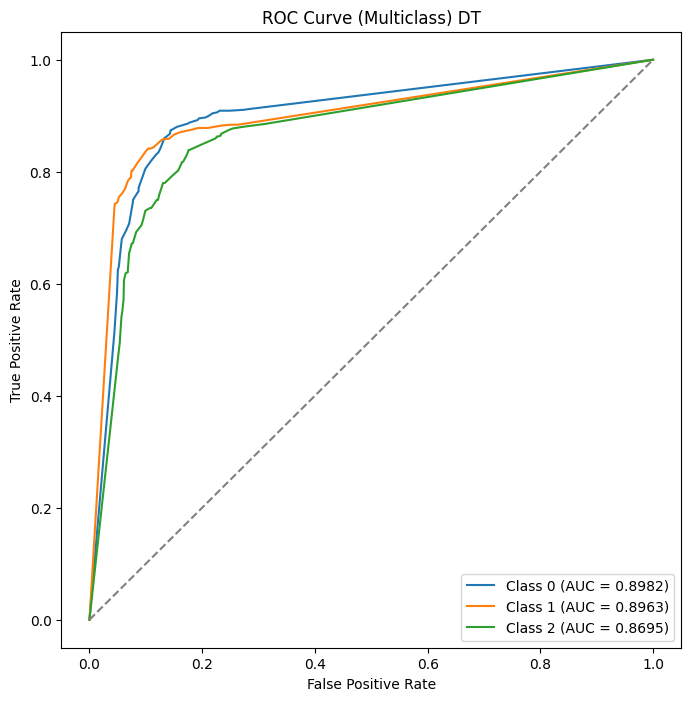

In [62]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=10)

# Train the model
dt_classifier.fit(X_train, y_train)

# Predict on test data
y_pred_DT = dt_classifier.predict(X_test)

# Print classification report
report = classification_report(y_test, y_pred_DT, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df.round(5)*100)
print("Train Accuracy:", accuracy_score(dt_classifier.predict(X_train), y_train).round(4)*100)
print("Test Accuracy:", accuracy_score(y_pred_DT, y_test).round(4)*100)

y_probs_dt = dt_classifier.predict_proba(X_test)
# Calculate AUC score for multiclass
auc_score = roc_auc_score(y_test, y_probs_dt, multi_class='ovr')
print(f"Multiclass AUC Score: {auc_score:.4f}")

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_DT)

# Visualize the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=dt_classifier.classes_, yticklabels=dt_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC Curve for each class
plt.figure(figsize=(8, 8))
for i, class_label in enumerate(dt_classifier.classes_):
    fpr, tpr, _ = roc_curve((y_test == class_label).astype(int), y_probs_dt[:, i])
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc_score((y_test == class_label).astype(int), y_probs_dt[:, i]):.4f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multiclass) DT')
plt.legend(loc='lower right')
plt.show()

              precision  recall  f1-score     support
0                93.475  93.475    93.475   65900.000
1                94.845  94.567    94.706   68100.000
2                90.143  90.431    90.287   62700.000
accuracy         92.883  92.883    92.883      92.883
macro avg        92.821  92.824    92.822  196700.000
weighted avg     92.887  92.883    92.885  196700.000
Train Accuracy: 93.81
Test Accuracy: 92.88
AUC Score (Macro-Averaged): 0.9889


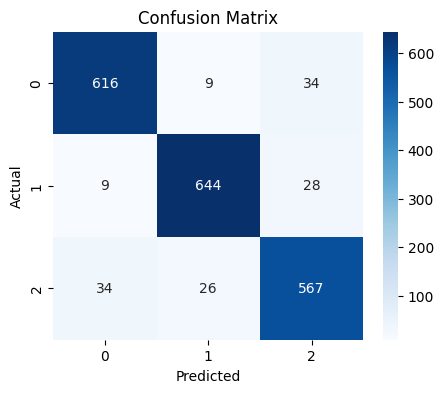

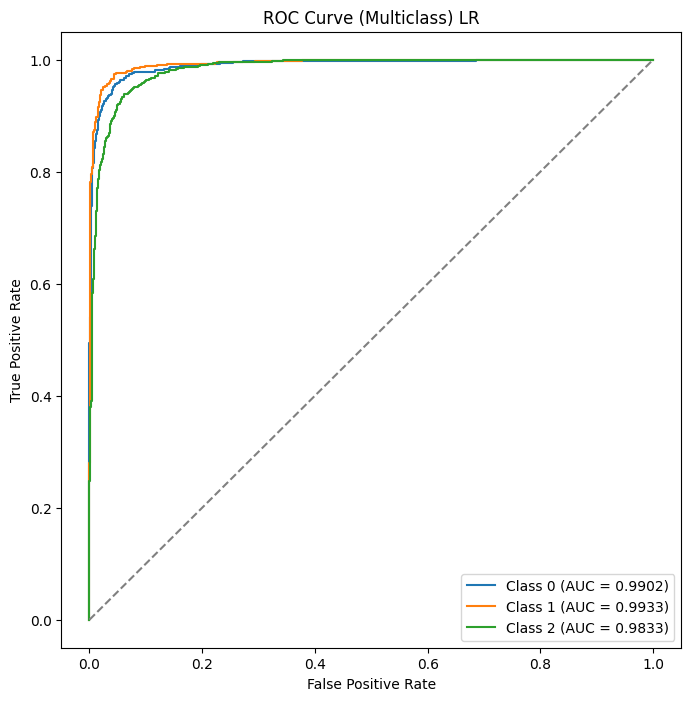

In [63]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression classifier
lr_classifier = LogisticRegression(C=10, solver='lbfgs')

# Train the model
lr_classifier.fit(X_train, y_train)

# Predict on test data
y_pred_LR = lr_classifier.predict(X_test)

# Print classification report
report = classification_report(y_test, y_pred_LR, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df.round(5)*100)
print("Train Accuracy:", accuracy_score(lr_classifier.predict(X_train), y_train).round(4)*100)
print("Test Accuracy:", accuracy_score(y_pred_LR, y_test).round(4)*100)

y_probs_lr = lr_classifier.predict_proba(X_test)
# Calculate AUC score for multiclass
auc_score = roc_auc_score(y_test, y_probs_lr, multi_class='ovr')
print("AUC Score (Macro-Averaged):", round(auc_score, 4))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_LR)
# Visualize the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=lr_classifier.classes_, yticklabels=lr_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC Curve for each class
plt.figure(figsize=(8, 8))
for i, class_label in enumerate(lr_classifier.classes_):
    fpr, tpr, _ = roc_curve((y_test == class_label).astype(int), y_probs_lr[:, i])
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc_score((y_test == class_label).astype(int), y_probs_lr[:, i]):.4f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multiclass) LR')
plt.legend(loc='lower right')
plt.show()

              precision  recall  f1-score     support
0                90.698  88.771    89.724   65900.000
1                91.483  91.483    91.483   68100.000
2                83.775  85.646    84.700   62700.000
accuracy         88.714  88.714    88.714      88.714
macro avg        88.652  88.633    88.636  196700.000
weighted avg     88.763  88.714    88.732  196700.000
Train Accuracy: 92.83
Test Accuracy: 88.71
AUC Score (Macro-Averaged): 0.9381


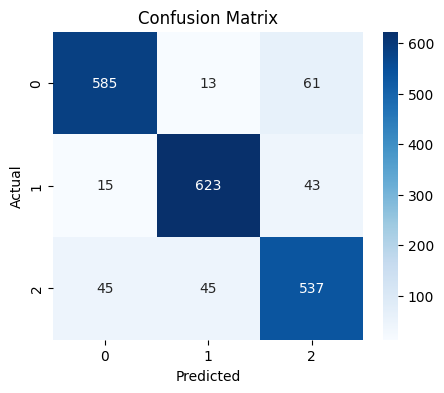

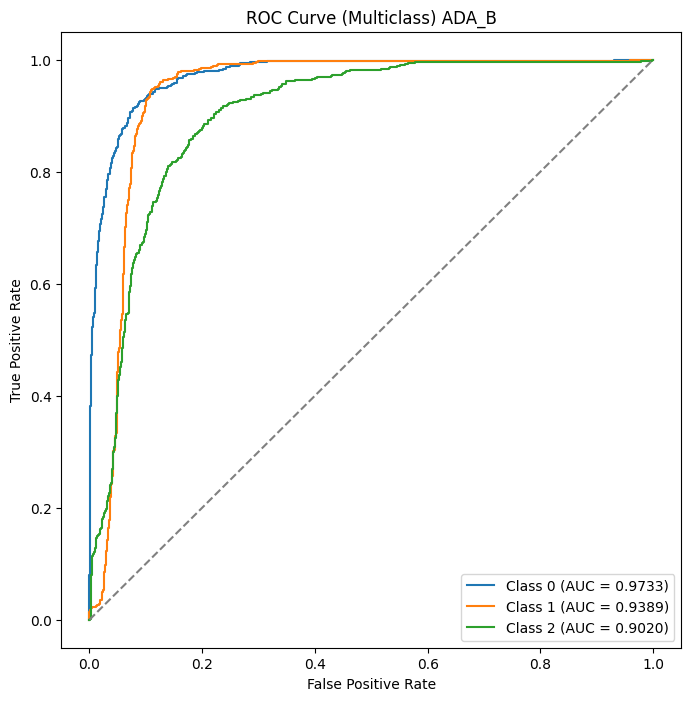

In [59]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize

# Initialize the AdaBoost classifier
ada_classifier = AdaBoostClassifier(n_estimators=200, learning_rate=1)

# Train the model
ada_classifier.fit(X_train, y_train)

# Predict on test data
y_pred_Ada = ada_classifier.predict(X_test)

# Print classification report
report = classification_report(y_test, y_pred_Ada, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df.round(5)*100)
print("Train Accuracy:", accuracy_score(ada_classifier.predict(X_train), y_train).round(4)*100)
print("Test Accuracy:", accuracy_score(y_pred_Ada, y_test).round(4)*100)

y_probs_ada = ada_classifier.predict_proba(X_test)
# Calculate AUC score for multiclass

auc_score = roc_auc_score(y_test, y_probs_ada, multi_class='ovr')
print("AUC Score (Macro-Averaged):", round(auc_score, 4))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_Ada)
# Visualize the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=ada_classifier.classes_, yticklabels=ada_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC Curve for each class
plt.figure(figsize=(8, 8))
for i, class_label in enumerate(ada_classifier.classes_):
    fpr, tpr, _ = roc_curve((y_test == class_label).astype(int), y_probs_ada[:, i])
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc_score((y_test == class_label).astype(int), y_probs_ada[:, i]):.4f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multiclass) ADA_B')
plt.legend(loc='lower right')
plt.show()

In [60]:
# End timing for the entire notebook
notebook_end_time = time.time()

In [61]:
# Compute execution time for counted cells
counted_execution_time = (notebook_end_time - notebook_start_time) - excluded_time
remaining_execution_time = notebook_end_time - remaining_start_time

# Display results
print(f"Total execution time (excluding skipped cell): {counted_execution_time:.2f} seconds")
print(f"Execution time for remaining cells: {remaining_execution_time:.2f} seconds")

Total execution time (excluding skipped cell): 352.72 seconds
Execution time for remaining cells: 17.25 seconds
